In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

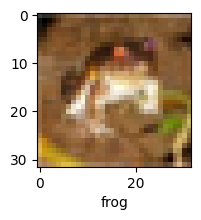

In [ ]:
plot_sample(X_train, y_train, 0)

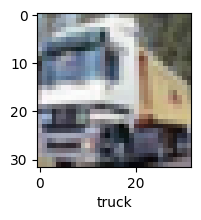

In [ ]:
plot_sample(X_train, y_train, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8140 - accuracy: 0.3569
Epoch 2/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6257 - accuracy: 0.4258
Epoch 3/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.5420 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 1.4836 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4352 - accuracy: 0.4952


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      1000
           1       0.71      0.39      0.50      1000
           2       0.39      0.33      0.35      1000
           3       0.35      0.37      0.36      1000
           4       0.48      0.35      0.41      1000
           5       0.42      0.33      0.37      1000
           6       0.55      0.52      0.53      1000
           7       0.61      0.48      0.54      1000
           8       0.61      0.63      0.62      1000
           9       0.40      0.78      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4589 - accuracy: 0.4776
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.0901 - accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9699 - accuracy: 0.6632
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8767 - accuracy: 0.6961
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8126 - accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7538 - accuracy: 0.7375
Epoch 7/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7011 - accuracy: 0.7568
Epoch 8/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6563 - accuracy: 0.7711
Epoch 9/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.6128 - accuracy: 0.7856
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9696 - accuracy: 0.6824


[0.9696405529975891, 0.6823999881744385]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[4.1086987e-05, 5.0919760e-05, 3.7204733e-04, 5.3114617e-01,
        5.7362579e-04, 4.6567807e-01, 1.4192826e-03, 8.2099752e-05,
        6.2295416e-04, 1.3766093e-05],
       [7.0914000e-05, 2.3433210e-03, 3.7774169e-06, 3.0037990e-07,
        1.8667434e-09, 6.2671297e-08, 2.0495802e-08, 2.2975474e-10,
        9.9736857e-01, 2.1300135e-04],
       [7.0819837e-01, 9.0442725e-02, 4.4841608e-03, 1.2734004e-02,
        6.3141104e-04, 1.4606745e-03, 7.0796872e-05, 5.0548040e-03,
        1.0397466e-01, 7.2948419e-02],
       [9.3453538e-01, 2.1382833e-04, 8.0814837e-03, 1.3465660e-03,
        8.3679619e-04, 1.2407766e-04, 3.3432781e-05, 1.2261171e-05,
        5.4590613e-02, 2.2558703e-04],
       [2.3902194e-07, 5.4879059e-05, 2.3160442e-03, 5.6056585e-02,
        9.0655100e-01, 4.0251156e-03, 3.0989785e-02, 3.8855040e-07,
        5.7759530e-06, 1.5313037e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

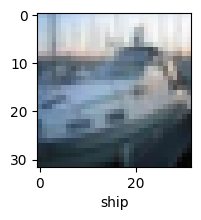

In [ ]:
plot_sample(X_test, y_test,2)

In [ ]:
classes[y_classes[2]]

'airplane'

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)

Text(50.72222222222221, 0.5, 'True')

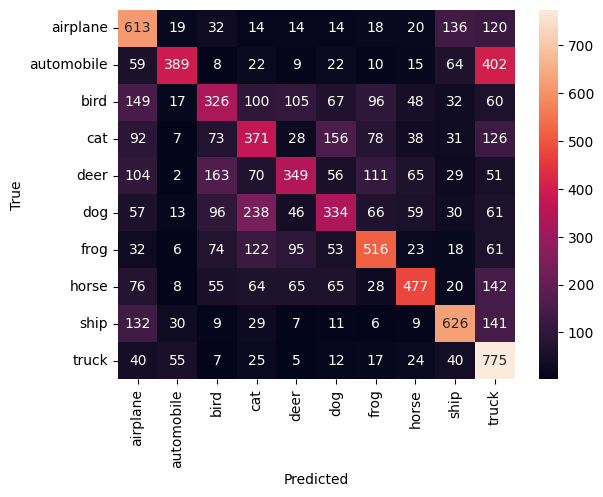

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sn

sn.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')